In [1]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns


# Data Import

In [43]:
#os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European")

#data_euro_1 = pd.read_csv('34187551-GCST90014288-GO_0007568.h.tsv.gz', sep='\t')
#data_euro_2 = pd.read_csv('34187551-GCST90014289-GO_0007568.h.tsv.gz', sep='\t')
#data_euro_3 = pd.read_csv('34187551-GCST90014290-GO_0007568.h.tsv.gz', sep='\t')
#data_euro_4 = pd.read_csv('34187551-GCST90014292-GO_0007568.h.tsv.gz', sep='\t')

os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African")

data_afri_1 = pd.read_csv('34187551-GCST90014294-GO_0007568.h.tsv.gz', sep='\t')
data_afri_2 = pd.read_csv('34187551-GCST90014295-GO_0007568.h.tsv.gz', sep='\t')
data_afri_3 = pd.read_csv('34187551-GCST90014296-GO_0007568.h.tsv.gz', sep='\t')
data_afri_4 = pd.read_csv('34187551-GCST90014298-GO_0007568.h.tsv.gz', sep='\t')

# Specify which data set to use

In [44]:
# European data set
#os.chdir("/Volumes/GoogleDrive/My Drive/PROJECT/Data/Aging Biomarkers/European")
#data1 = data_euro_1; data2 = data_euro_2; data3 = data_euro_3; data4 = data_euro_4

In [45]:
# African directory
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African")
data1 = data_afri_1; data2 = data_afri_2; data3 = data_afri_3; data4 = data_afri_4

# Isolating chromosomes

In [46]:
snp_index_1 = []
snp_index_2 = []
snp_index_3 = []
snp_index_4 = []

for i in range(23):
    snp_index_1.append(data1.hm_rsid.loc[np.where(data1.hm_chrom==i+1)])
    snp_index_2.append(data2.hm_rsid.loc[np.where(data2.hm_chrom==i+1)])
    snp_index_3.append(data3.hm_rsid.loc[np.where(data3.hm_chrom==i+1)])
    snp_index_4.append(data4.hm_rsid.loc[np.where(data4.hm_chrom==i+1)])

In [47]:
snp_index_aloha = []

for i in range(23):
    l1 = list(set(snp_index_1[i]).intersection(snp_index_2[i]))
    l2 = list(set(l1).intersection(snp_index_3[i]))
    l3 = list(set(l2).intersection(snp_index_4[i]))

    snp_index_aloha.append(pd.Series(l3).dropna())
    

<ipython-input-47-c423193ff32d>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  snp_index_aloha.append(pd.Series(l3).dropna())


# Isolating SNP sets

In [48]:
filtered_snp_index_1 = []
filtered_snp_index_2 = []
filtered_snp_index_3 = []
filtered_snp_index_4 = []

count=0
for i in range(23):
    filtered_snp_index_1.append(list(set(data1.hm_rsid.loc[np.where(data1.p_value<0.05)]).intersection(snp_index_aloha[i])))
    filtered_snp_index_2.append(list(set(data2.hm_rsid.loc[np.where(data2.p_value<0.05)]).intersection(snp_index_aloha[i])))
    filtered_snp_index_3.append(list(set(data3.hm_rsid.loc[np.where(data3.p_value<0.05)]).intersection(snp_index_aloha[i])))
    filtered_snp_index_4.append(list(set(data4.hm_rsid.loc[np.where(data4.p_value<0.05)]).intersection(snp_index_aloha[i])))
    
    count+=len(filtered_snp_index_1[i])+len(filtered_snp_index_2[i])+len(filtered_snp_index_3[i])+len(filtered_snp_index_4[i])
    
    

In [49]:
count

3736092

In [50]:
print(len(data1)+
      len(data2)+
      len(data3)+
      len(data4))

51956669


In [51]:
snp_index_aloha_filtered = []
count_aloha=0
for i in range(23):
    l1 = list(set(filtered_snp_index_1[i]).intersection(filtered_snp_index_2[i]))
    l2 = list(set(l1).intersection(filtered_snp_index_3[i]))
    l3 = list(set(l2).intersection(filtered_snp_index_4[i]))

    snp_index_aloha_filtered.append(pd.Series(l3).dropna())
    count_aloha+=len(snp_index_aloha_filtered[i])

<ipython-input-51-a406dbc08c66>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  snp_index_aloha_filtered.append(pd.Series(l3).dropna())


In [52]:
count_aloha

9521

# Compilation and Exportation

In [10]:
data1.index = data1.hm_rsid
data2.index = data2.hm_rsid
data3.index = data3.hm_rsid
data4.index = data4.hm_rsid

In [13]:
#comp_and_export(snp_index_aloha, snp_index_aloha_filtered)

Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete
Complete


### Don't forget to uncomment the export line

In [12]:
def comp_and_export(snp_index_aloha, snp_index_aloha_filtered):
    for CHROM in range(23):
    
    
        data_1_full = data1.loc[snp_index_aloha[CHROM]]
        data_2_full = data2.loc[snp_index_aloha[CHROM]]
        data_3_full = data3.loc[snp_index_aloha[CHROM]]
        data_4_full = data4.loc[snp_index_aloha[CHROM]]

        data_1_filtered = data1.loc[snp_index_aloha_filtered[CHROM]]
        data_2_filtered = data2.loc[snp_index_aloha_filtered[CHROM]]
        data_3_filtered = data3.loc[snp_index_aloha_filtered[CHROM]]
        data_4_filtered = data4.loc[snp_index_aloha_filtered[CHROM]]

    
    
    
    
        TRAIT_1_full = data_1_full[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_full=TRAIT_1_full.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_full = data_2_full[
        ['beta','standard_error']
        ]
        TRAIT_3_full = data_3_full[
        ['beta','standard_error']
        ]
        TRAIT_4_full = data_4_full[
        ['beta','standard_error']
        ]

        S_XY_full = TRAIT_1_full
        S_XY_full['trait2_b']=TRAIT_2_full['beta']
        S_XY_full['trait2_se']=TRAIT_2_full['standard_error']
        S_XY_full['trait3_b']=TRAIT_3_full['beta']
        S_XY_full['trait3_se']=TRAIT_3_full['standard_error']
        S_XY_full['trait4_b']=TRAIT_4_full['beta']
        S_XY_full['trait4_se']=TRAIT_4_full['standard_error']


    
    
    
    
    
        TRAIT_1_filtered = data_1_filtered[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_filtered=TRAIT_1_filtered.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_filtered = data_2_filtered[
        ['beta','standard_error']
        ]
        TRAIT_3_filtered = data_3_filtered[
        ['beta','standard_error']
        ]
        TRAIT_4_filtered = data_4_filtered[
        ['beta','standard_error']
        ]

        S_XY_filtered = TRAIT_1_filtered
        S_XY_filtered['trait2_b']=TRAIT_2_filtered['beta']
        S_XY_filtered['trait2_se']=TRAIT_2_filtered['standard_error']
        S_XY_filtered['trait3_b']=TRAIT_3_filtered['beta']
        S_XY_filtered['trait3_se']=TRAIT_3_filtered['standard_error']
        S_XY_filtered['trait4_b']=TRAIT_4_filtered['beta']
        S_XY_filtered['trait4_se']=TRAIT_4_filtered['standard_error']
    
    
        #S_XY Export
        S_XY_full.to_csv('Jupyter_Exports/S_XY_full{}.csv'.format(CHROM),index=True)
        S_XY_filtered.to_csv('Jupyter_Exports/S_XY_filtered{}.csv'.format(CHROM),index=True)
        
        print("Chromosom {} complete".format(CHROM))

# Section B

## Results Import

In [11]:
result = []
p_value = []
significant_p_value = []
for CHROM in range(23):
    results = pd.read_csv('Jupyter_Exports/Results_Chrom_{}.csv'.format(CHROM+1),index_col=0)
    
    p_values = 10**(-results['-log10(p-val)'])
    p_value.append(p_values)
    print("Number of significant associations in Chromosome {} BEFORE correction: ".format(CHROM+1)
          ,len(p_values.iloc[np.where(p_values<0.05)]))
    
    adjusted_p_values = p_values*len(data1)
    significant_p_value.extend(results.index[np.where(adjusted_p_values<0.05)])

    p_values_corrected = adjusted_p_values.iloc[np.where(adjusted_p_values<0.05)]
    print("Number of significant associations in Chromosome {} AFTER correction: ".format(CHROM+1),len(p_values_corrected))

Number of significant associations in Chromosome 1 BEFORE correction:  760
Number of significant associations in Chromosome 1 AFTER correction:  0
Number of significant associations in Chromosome 2 BEFORE correction:  750
Number of significant associations in Chromosome 2 AFTER correction:  0
Number of significant associations in Chromosome 3 BEFORE correction:  962
Number of significant associations in Chromosome 3 AFTER correction:  22
Number of significant associations in Chromosome 4 BEFORE correction:  709
Number of significant associations in Chromosome 4 AFTER correction:  0
Number of significant associations in Chromosome 5 BEFORE correction:  542
Number of significant associations in Chromosome 5 AFTER correction:  0
Number of significant associations in Chromosome 6 BEFORE correction:  635
Number of significant associations in Chromosome 6 AFTER correction:  15
Number of significant associations in Chromosome 7 BEFORE correction:  449
Number of significant associations in Chr

# Published Associations

In [44]:
response = requests.get('https://www.ebi.ac.uk/gwas/rest/api/efoTraits/GO_0007568/associations')
GWAS_EBI=response.json()

In [45]:
published_snps=[]
for i in range(len(GWAS_EBI['_embedded']['associations'])):
    published_snps.append(GWAS_EBI['_embedded']['associations'][i]['loci'][0]['strongestRiskAlleles'][0]['riskAlleleName'])
    
print("Number of PUBLISHED significant associations: ",len(published_snps))

Number of PUBLISHED significant associations:  209


# Plotting

# Experimentation

Text(0.5, 0, 'Chromosome ID')

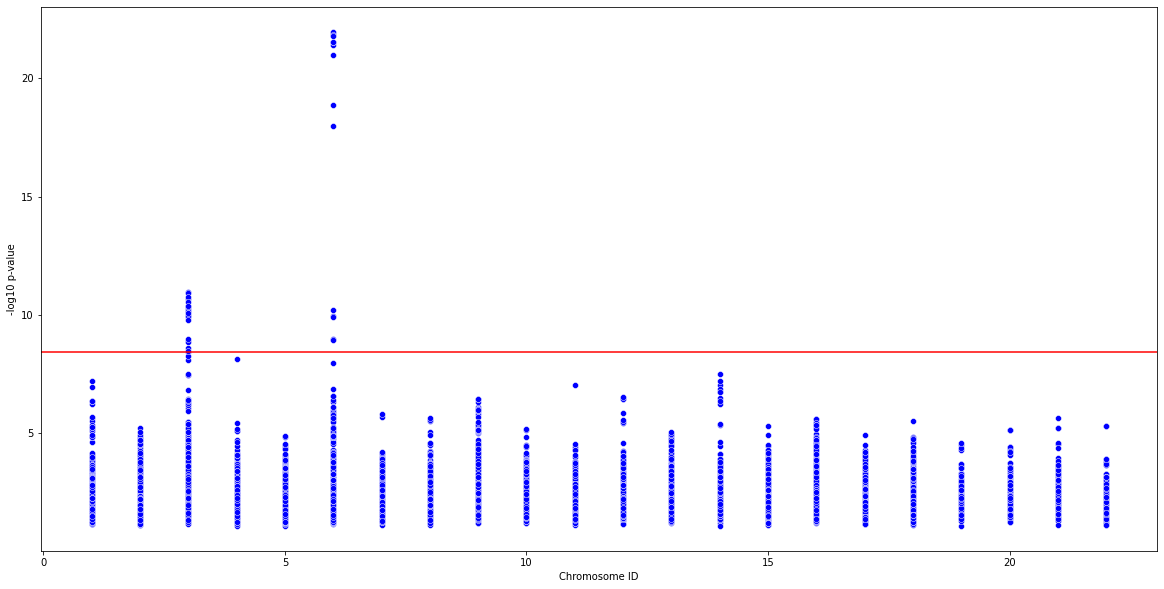

In [12]:
import seaborn as sns
data1.index = data1.hm_rsid
plt.figure(figsize=(20,10))
for CHROM in range(23):
    sns.scatterplot(x=data1.loc[p_value[CHROM].index].hm_chrom,y=-np.log10(p_value[CHROM]),color='b')#label="Chromosome {}".format(CHROM+1))
plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-', label = "Significance threshold")
#plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

# Outdated

plt.figure(figsize=(20,10))
sns.scatterplot(x=data3_filtered.hm_chrom,y=-np.log10(data3_filtered.p_value), label = "Epigenetic")
plt.axhline(y = -np.log10(0.05/len(data3)), color = 'r', linestyle = '-',label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

# Relevant

In [20]:
data1.index = data1.hm_rsid
data2.index = data2.hm_rsid
data3.index = data3.hm_rsid
data4.index = data4.hm_rsid

Text(0.5, 0, 'Chromosome ID')

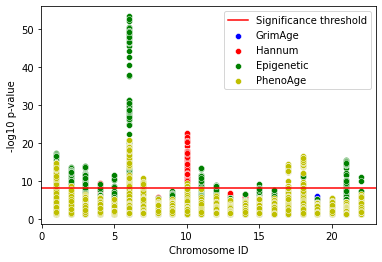

In [21]:


#plt.figure(figsize=(20,10))

sns.scatterplot(x=data1.loc[list(filtered_snp_index_1[0])].hm_chrom,y=-np.log10(data1.loc[list(filtered_snp_index_1[0])].p_value),color='b',label="GrimAge")
sns.scatterplot(x=data2.loc[list(filtered_snp_index_2[0])].hm_chrom,y=-np.log10(data2.loc[list(filtered_snp_index_2[0])].p_value),color='r',label="Hannum")
sns.scatterplot(x=data3.loc[list(filtered_snp_index_3[0])].hm_chrom,y=-np.log10(data3.loc[list(filtered_snp_index_3[0])].p_value),color='g',label="Epigenetic")
sns.scatterplot(x=data4.loc[list(filtered_snp_index_4[0])].hm_chrom,y=-np.log10(data4.loc[list(filtered_snp_index_4[0])].p_value),color='y',label="PhenoAge")

for i in range(22):
    sns.scatterplot(x=data1.loc[list(filtered_snp_index_1[i+1])].hm_chrom,y=-np.log10(data1.loc[list(filtered_snp_index_1[i+1])].p_value),color='b')#,label="GrimAge")
    sns.scatterplot(x=data2.loc[list(filtered_snp_index_2[i+1])].hm_chrom,y=-np.log10(data2.loc[list(filtered_snp_index_2[i+1])].p_value),color='r')#,label="Hannum")
    sns.scatterplot(x=data3.loc[list(filtered_snp_index_3[i+1])].hm_chrom,y=-np.log10(data3.loc[list(filtered_snp_index_3[i+1])].p_value),color='g')#,label="Epigenetic")
    sns.scatterplot(x=data4.loc[list(filtered_snp_index_4[i+1])].hm_chrom,y=-np.log10(data4.loc[list(filtered_snp_index_4[i+1])].p_value),color='y')#,label="PhenoAge")

plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-',label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

In [14]:
significant_snps_gwas = []
significant_snps_gwas.extend(data1.hm_rsid.iloc[np.where(data1.p_value*len(data1)<0.05)])
significant_snps_gwas.extend(data2.hm_rsid.iloc[np.where(data2.p_value*len(data1)<0.05)])
significant_snps_gwas.extend(data3.hm_rsid.iloc[np.where(data3.p_value*len(data1)<0.05)])
significant_snps_gwas.extend(data4.hm_rsid.iloc[np.where(data4.p_value*len(data1)<0.05)])


In [15]:
overlapping_snps = list(set(significant_p_value).intersection(significant_snps_gwas))

In [16]:
len(overlapping_snps)

37

In [17]:
len(significant_p_value)

37

In [20]:
main_list = list(  set(significant_p_value) - set(significant_snps_gwas))


In [21]:
main_list

[]

# EU

# SNPs that are not yet published, in relation to aging,on the EBI GWAS Archive 
# Gene functions were found using genecards.org
## rs7750541, TCF 19
### Potential trans-activating factor that could play an important role in the transcription of genes required for the later stages of cell cycle progression.
## rs130076, CCHCR1
### May be a regulator of keratinocyte proliferation or differentiation. 
## rs3130455, TCF 19/CCHCR1
## rs3131006, PSORS1C1
### Psoriasis Susceptibility - Psoriasis is a long-lasting, noncontagious autoimmune disease characterized by raised areas of abnormal skin.
## rs3132568, PSORS1C1
# rs1619179 
## HLA-B/-C
### The major histocompatibility complex (MHC) is a large locus on vertebrate DNA containing a set of closely linked polymorphic genes that code for cell surface proteins essential for the adaptive immune system. 
## POU5F1 - Already published
### Oct-4 is a homeodomain transcription factor of the POU family. It is critically involved in the self-renewal of undifferentiated embryonic stem cells. As such, it is frequently used as a marker for undifferentiated cells. Oct-4 expression must be closely regulated; too much or too little will cause differentiation of the cells.
## AGER
### Mediates interactions of advanced glycosylation end products (AGE). These are nonenzymatically glycosylated proteins which accumulate in vascular tissue in aging and at an accelerated rate in diabetes. Acts as a mediator of both acute and chronic vascular inflammation in conditions such as atherosclerosis and in particular as a complication of diabetes. 
## HCG27
### HLA Complex Group
## ENSG00000272501	
### Novel Transcript, Antisense To HCG27
## 	ENSG00000271821	
### Novel Transcript
## ENSG00000271581	
### HLA Complex Group 4 (HCG4) Pseudogene
## ENSG00000229836	
### Novel HLA Class I Pseudogene Fragment
## ENSG00000255726	
### Mitochondrial Coiled-Coil Domain 1 (MCCD1) Pseudogene
## MN298114-181
## MK280269-056
## rs3130564, PSORS1C1

In [79]:
print(main_list)
results


['rs7750641', 'rs130076', 'rs3130455', 'rs3131006', 'rs3132568', 'rs1619179', 'rs3130564']


,r_1,-log10(p-val)
rs55878035,0.004109,1.384319
rs34470970,0.004218,1.481147
rs74966936,0.004124,1.397254
rs73396549,0.004350,1.603506
rs16992276,0.004672,1.922268
rs61117377,0.004134,1.406443
rs2413715,0.004190,1.456083
rs9614176,0.005127,2.422418
rs5758906,0.003979,1.273052
rs28910284,0.003955,1.252797


In [120]:
sig_p_value = []
for i in range(23):
    for j in range(len(main_list)):
        try:sig_p_value.append(p_value[i][main_list[j]]*len(data1))
        except:KeyError
        pass

In [121]:
main_list + sig_p_value

['rs7750641',
 'rs130076',
 'rs3130455',
 'rs3131006',
 'rs3132568',
 'rs1619179',
 'rs3130564',
 0.005337506358014958,
 0.031750794764908705,
 0.03425847373185285,
 0.022699319855000913,
 0.020846918567109702,
 0.003910327480578295,
 0.01718391231609864]

In [123]:
final_results_table = pd.DataFrame()
final_results_table['rsid']=main_list
final_results_table['p_value']=sig_p_value


In [124]:
final_results_table

,rsid,p_value
0,rs7750641,0.005338
1,rs130076,0.031751
2,rs3130455,0.034258
3,rs3131006,0.022699
4,rs3132568,0.020847
5,rs1619179,0.003910
6,rs3130564,0.017184
